In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from main import propagate, optimize, model, predict

In [2]:
df = pd.read_csv('CarPrice.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.drop(columns=['CarName','car_ID', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem', 'doornumber', 'enginetype', 'cylindernumber'], inplace=True)

In [5]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
pre_process = preprocessing.StandardScaler()

df_norm = (df - df.mean()) / (df.max() - df.min())

# Putting feature variable to X
X = df_norm[['symboling','wheelbase','carlength',
             'carwidth','curbweight', 'enginesize', 
             'boreratio', 'stroke', 'compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg'
            ]]

# Putting response variable to y
y = df_norm['price']


X = pd.DataFrame(pre_process.fit_transform(X))

#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=2)

In [7]:
model1 = model(X_train=X_train, Y_train=y_train, X_test=X_test, Y_test=y_test, num_iterations = 500, learning_rate = 0.001)

model2 = model(X_train=X_train, Y_train=y_train, X_test=X_test, Y_test=y_test, num_iterations = 500, learning_rate = 0.01)

model3 = model(X_train=X_train, Y_train=y_train, X_test=X_test, Y_test=y_test, num_iterations = 500, learning_rate = 0.1)

train accuracy: 93.21010274024789 %
test accuracy: 92.98217102985471 %
train accuracy: 94.71508493012426 %
test accuracy: 93.72894780455972 %
train accuracy: 94.78159091567125 %
test accuracy: 93.70437417753726 %


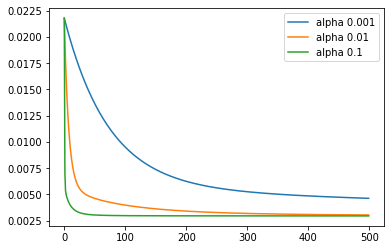

In [8]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(500)], model1['costs'])
plt.plot([i for i in range(500)], model2['costs'])
plt.plot([i for i in range(500)], model3['costs'])

plt.gca().legend(('alpha 0.001','alpha 0.01', 'alpha 0.1'))
plt.show()